<a href="https://colab.research.google.com/github/min02yam/R-study/blob/main/20220515_%EC%97%B0%EA%B4%80%EC%84%B1%EB%B6%84%EC%84%9D_Lotto_%EB%8B%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-----------------------------------------------------------

### 4. lotto 데이터를 활용하여 아래를 해결하시오
#### 4-1. 연관규칙분석을 수행하기 위해 데이터셋을 transaction 데이터로 변환하시오 그리고, 변환된 데이터에서 가장 많이 등장한 상위 10개의 로또번호를 막대그래프로 출력하시오

#### 4-2. 변환 데이테에 대해 apriori 함수를 사용하여 연관규칙을 생성하시오. (최소지지도 ; 0.002, 최소신뢰도 : 0.8, 초대조합 항목 수 :6개)

#### 4-3. 도출된 연관규칙들을 향상도 기준으로 내림차순하여 상위 30개의 규칙을 확인하고, 이를 데이터프레임으로 변환하여 CSV파일로 출력하시오

-----------------------------------------------------------

# **😎목차**
    1. 데이터 로드 (4-1)
    2. 모델링 (4-2)
    3. 시각화
    4. 결론(4-3)

# **1. 데이터 로드 (4-1)**

In [1]:
#패키지설치
install.packages("arules"); install.packages("arulesViz")
library(arules); library(arulesViz)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘zoo’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘gridExtra’, ‘RcppArmadillo’, ‘later’, ‘TSP’, ‘qap’, ‘gclus’, ‘registry’, ‘lmtest’, ‘Rcpp’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘lazyeval’, ‘seriation’, ‘vcd’, ‘igraph’, ‘scatterplot3d’, ‘ggraph’, ‘DT’, ‘plotly’, ‘visNetwork’


Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [12]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:arules’:

    intersect, recode, setdiff, setequal, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [35]:
#데이터 로드
df<-read.csv("/content/lotto.csv")
head(df)
str(df); summary(df)

,time_id,num1,num2,num3,num4,num5,num6
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,859,8,22,35,38,39,41
2,858,9,13,32,38,39,43
3,857,6,10,16,28,34,38
4,856,10,24,40,41,43,44
5,855,8,15,17,19,43,44
6,854,20,25,31,32,36,43


'data.frame':	859 obs. of  7 variables:
 $ time_id: int  859 858 857 856 855 854 853 852 851 850 ...
 $ num1   : int  8 9 6 10 8 20 2 11 14 16 ...
 $ num2   : int  22 13 10 24 15 25 8 17 18 20 ...
 $ num3   : int  35 32 16 40 17 31 23 28 22 24 ...
 $ num4   : int  38 38 28 41 19 32 26 30 26 28 ...
 $ num5   : int  39 39 34 43 43 36 27 33 31 36 ...
 $ num6   : int  41 43 38 44 44 43 44 35 44 39 ...


    time_id           num1             num2            num3      
 Min.   :  1.0   Min.   : 1.000   Min.   : 2.00   Min.   : 3.00  
 1st Qu.:215.5   1st Qu.: 2.500   1st Qu.: 8.00   1st Qu.:14.00  
 Median :430.0   Median : 5.000   Median :12.00   Median :19.00  
 Mean   :430.0   Mean   : 6.641   Mean   :13.01   Mean   :19.86  
 3rd Qu.:644.5   3rd Qu.:10.000   3rd Qu.:17.00   3rd Qu.:25.00  
 Max.   :859.0   Max.   :35.000   Max.   :37.00   Max.   :40.00  
      num4            num5            num6      
 Min.   : 5.00   Min.   : 9.00   Min.   :19.00  
 1st Qu.:21.00   1st Qu.:28.00   1st Qu.:37.00  
 Median :27.00   Median :34.00   Median :41.00  
 Mean   :26.18   Mean   :32.84   Mean   :39.48  
 3rd Qu.:32.00   3rd Qu.:38.00   3rd Qu.:44.00  
 Max.   :43.00   Max.   :44.00   Max.   :45.00  

In [36]:
#데이터 변환
df<-df[,-1] #id빼고

In [37]:
ltt<-as(df,"transactions"); class(ltt)
inspect(ltt[1:5])   # 변환된 결과 확인 
#? discretizeDF

Warning message:
“Column(s) 1, 2, 3, 4, 5, 6 not logical or factor. Applying default discretization (see '? discretizeDF').”


[1] "transactions"
attr(,"package")
[1] "arules"

    items           transactionID
[1] {num1=[8,35],                
     num2=[15,37],               
     num3=[23,40],               
     num4=[30,43],               
     num5=[37,44],               
     num6=[38,43)}              1
[2] {num1=[8,35],                
     num2=[9,15),                
     num3=[23,40],               
     num4=[30,43],               
     num5=[37,44],               
     num6=[43,45]}              2
[3] {num1=[3,8),                 
     num2=[9,15),                
     num3=[16,23),               
     num4=[23,30),               
     num5=[30,37),               
     num6=[38,43)}              3
[4] {num1=[8,35],                
     num2=[15,37],               
     num3=[23,40],               
     num4=[30,43],               
     num5=[37,44],               
     num6=[43,45]}              4
[5] {num1=[8,35],                
     num2=[15,37],               
     num3=[16,23),               
     num4=[5,23),                
     num5=[37,

❌Warning message❌<br>
“Column(s) 1, 2, 3, 4, 5, 6 not logical or factor. Applying default discretization (see '? discretizeDF').”
- 뉴메릭이라서 discretizeDF 함수로 임의로 구간 나눈 것 같음
- `discretizeDF` -> 예제 살펴보니 분리하는 알고리즘임
- 근데 예제에서는 경고 떠도 잘 분리 됨 -> 확인해보니 팩터로 저장함 

In [38]:
#팩터로 변경
for (j in 1:6) {
df[,j]<-as.character(df[,j])
}
str(df)

'data.frame':	859 obs. of  6 variables:
 $ num1: chr  "8" "9" "6" "10" ...
 $ num2: chr  "22" "13" "10" "24" ...
 $ num3: chr  "35" "32" "16" "40" ...
 $ num4: chr  "38" "38" "28" "41" ...
 $ num5: chr  "39" "39" "34" "43" ...
 $ num6: chr  "41" "43" "38" "44" ...


In [39]:
#다시 트랜잭션 변환
ltt<-as(df,"transactions")
inspect(ltt[1:5]) 

Warning message:
“Column(s) 1, 2, 3, 4, 5, 6 not logical or factor. Applying default discretization (see '? discretizeDF').”


    items      transactionID
[1] {num1=8,                
     num2=22,               
     num3=35,               
     num4=38,               
     num5=39,               
     num6=41}              1
[2] {num1=9,                
     num2=13,               
     num3=32,               
     num4=38,               
     num5=39,               
     num6=43}              2
[3] {num1=6,                
     num2=10,               
     num3=16,               
     num4=28,               
     num5=34,               
     num6=38}              3
[4] {num1=10,               
     num2=24,               
     num3=40,               
     num4=41,               
     num5=43,               
     num6=44}              4
[5] {num1=8,                
     num2=15,               
     num3=17,               
     num4=19,               
     num5=43,               
     num6=44}              5


In [40]:
#간단 구조 확인
head(ltt); str(ltt); summary(ltt)

transactions in sparse format with
 6 transactions (rows) and
 201 items (columns)

Formal class 'transactions' [package "arules"] with 3 slots
  ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. ..@ i       : int [1:5154] 26 41 89 129 167 196 27 31 86 129 ...
  .. .. ..@ p       : int [1:860] 0 6 12 18 24 30 36 42 48 54 ...
  .. .. ..@ Dim     : int [1:2] 201 859
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ factors : list()
  ..@ itemInfo   :'data.frame':	201 obs. of  3 variables:
  .. ..$ labels   : chr [1:201] "num1=1" "num1=10" "num1=11" "num1=12" ...
  .. ..$ variables: Factor w/ 6 levels "num1","num2",..: 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ levels   : Factor w/ 45 levels "1","10","11",..: 1 2 3 4 5 6 7 8 9 10 ...
  ..@ itemsetInfo:'data.frame':	859 obs. of  1 variable:
  .. ..$ transactionID: chr [1:859] "1" "2" "3" "4" ...


transactions as itemMatrix in sparse format with
 859 rows (elements/itemsets/transactions) and
 201 columns (items) and a density of 0.02985075 

most frequent items:
 num1=1 num6=45 num6=44 num6=43  num1=2 (Other) 
    122     121     105      99      93    4614 

element (itemset/transaction) length distribution:
sizes
  6 
859 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      6       6       6       6       6       6 

includes extended item information - examples:
   labels variables levels
1  num1=1      num1      1
2 num1=10      num1     10
3 num1=11      num1     11

includes extended transaction information - examples:
  transactionID
1             1
2             2
3             3

- most frequent items:<br>
 num1=1 /num6=45/ num6=44/ num6=43 / num1=2 /(Other) <br>
    122  /   121    / 105      /99     / 93  /  4614 

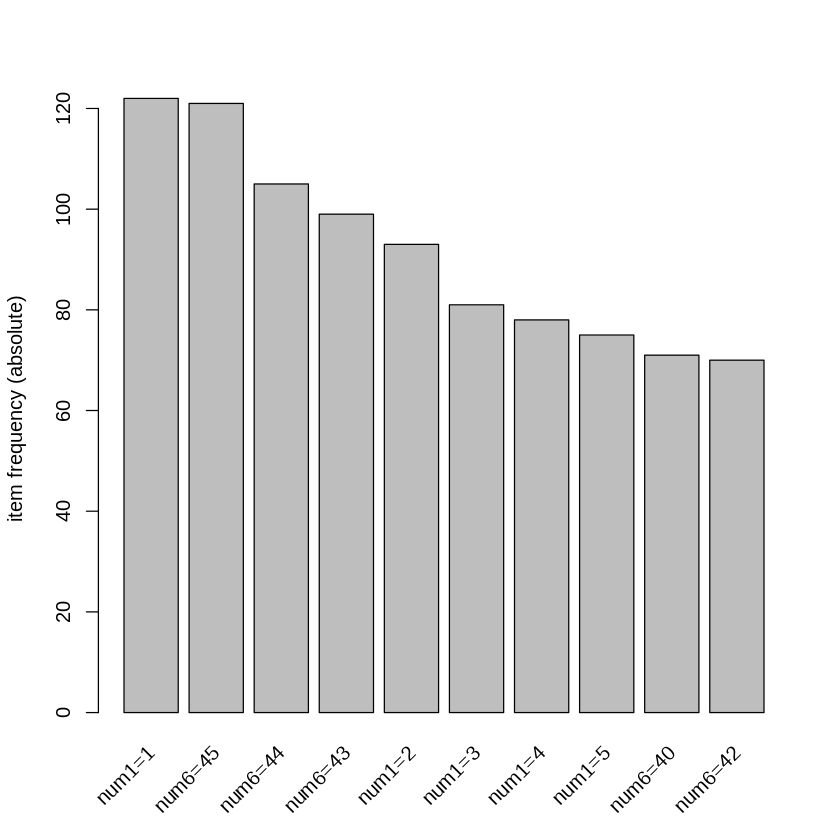

In [41]:
#상위 10개의 로또번호 막대그래프로 출력
itemFrequencyPlot(ltt, topN=10, type="absolute")

1. 가장 많이 나온 번호는 num1에서 1 : 122  회
2. 그 다음 num6에서 45: 121회

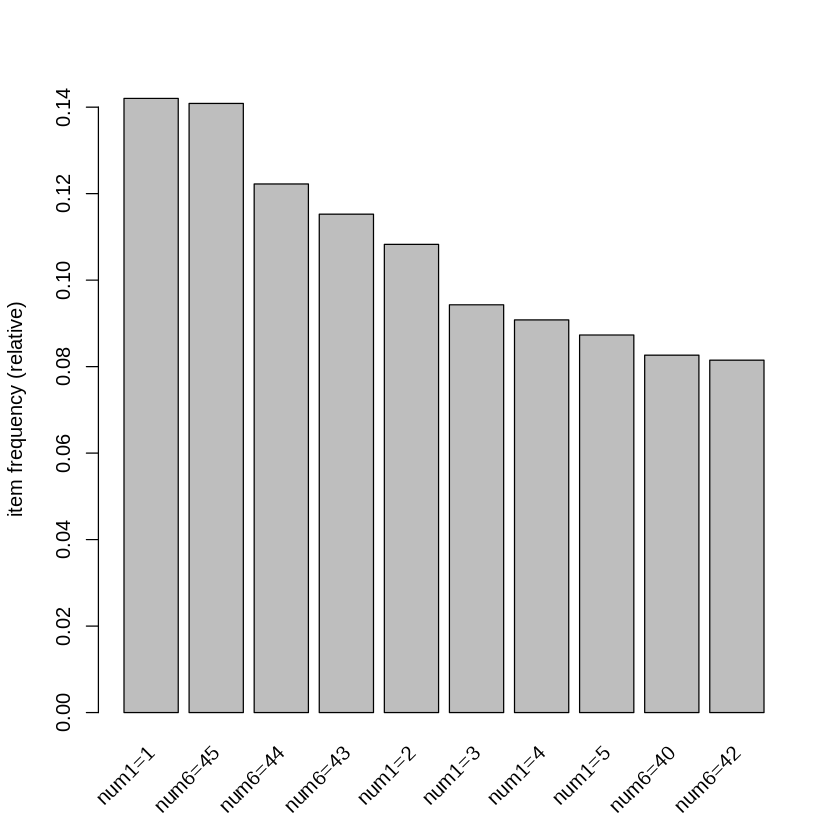

In [42]:
#상대빈도
itemFrequencyPlot(ltt, topN=10)

# **2. 모델링 (4-2)**

- 최소지지도 ; 0.002, 최소신뢰도 : 0.8, 초대조합 항목 수 :6개

In [45]:
rules<-apriori(ltt, parameter=list( supp=0.002, conf=0.8, maxlen=6 ))
rules

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.002      1
 maxlen target  ext
      6  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[201 item(s), 859 transaction(s)] done [0.00s].
sorting and recoding items ... [187 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [868 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 868 rules 

- 총 set of 868 rules 발견

4-3. 도출된 연관규칙들을 향상도 기준으로 내림차순하여 상위 30개의 규칙을 확인하고, 이를 데이터프레임으로 변환하여 CSV파일로 출력하시오

In [49]:
#규칙확인
options(digits = 2)
rules<-sort(rules, by="confidence", decreasing = TRUE) 
inspect(rules[1:30,])

     lhs                   rhs       support confidence coverage lift  count
[1]  {num5=13}          => {num4=12} 0.0023  1          0.0023    66.1  2   
[2]  {num5=13}          => {num3=11} 0.0023  1          0.0023    31.8  2   
[3]  {num5=13}          => {num1=3}  0.0023  1          0.0023    10.6  2   
[4]  {num1=24}          => {num6=39} 0.0023  1          0.0023    16.5  2   
[5]  {num3=38}          => {num4=39} 0.0023  1          0.0023    71.6  2   
[6]  {num3=38}          => {num5=40} 0.0023  1          0.0023    19.5  2   
[7]  {num2=31}          => {num3=35} 0.0023  1          0.0023    85.9  2   
[8]  {num2=31}          => {num4=38} 0.0023  1          0.0023    53.7  2   
[9]  {num2=31}          => {num6=44} 0.0023  1          0.0023     8.2  2   
[10] {num2=33}          => {num4=40} 0.0023  1          0.0023    85.9  2   
[11] {num6=24}          => {num2=3}  0.0023  1          0.0023    31.8  2   
[12] {num6=24}          => {num1=2}  0.0023  1          0.0023     9.2  2   

1. 상위 30개의 규칙은 confidence값이 1로 같음 

In [65]:
#그래서 리프트 값으로 재정렬 
rules<-sort(rules, by="lift", decreasing = TRUE) 
inspect(rules[1:30,])

     lhs                            rhs       support confidence coverage lift
[1]  {num1=3, num4=12}           => {num5=13} 0.0023  1          0.0023   430 
[2]  {num1=3, num3=11, num4=12}  => {num5=13} 0.0023  1          0.0023   430 
[3]  {num3=35, num4=38, num6=44} => {num2=31} 0.0023  1          0.0023   430 
[4]  {num4=16, num5=21}          => {num6=29} 0.0023  1          0.0023   143 
[5]  {num3=9, num4=16}           => {num5=17} 0.0023  1          0.0023   123 
[6]  {num1=9, num4=35}           => {num3=34} 0.0023  1          0.0023    95 
[7]  {num2=9, num4=14}           => {num6=28} 0.0023  1          0.0023    95 
[8]  {num1=4, num3=11, num4=12}  => {num6=27} 0.0023  1          0.0023    95 
[9]  {num2=31}                   => {num3=35} 0.0023  1          0.0023    86 
[10] {num2=33}                   => {num4=40} 0.0023  1          0.0023    86 
[11] {num2=31, num4=38}          => {num3=35} 0.0023  1          0.0023    86 
[12] {num2=31, num6=44}          => {num3=35} 0.0023

1. ***IF*** {num1=3, num4=12}       ***THEN*** {num5=13}
2. ***IF*** {num1=3, num3=11, num4=12}       ***THEN*** {num5=13}
3. ***IF*** {num3=35, num4=38, num6=44}       ***THEN*** {num2=31}<br>
4. 위의 세 규칙은 모두 리프트값이 430으로 
5. 좌측의 숫자 세트가 나오지 않았을 때 우측의 숫자가 나올 확률에 비해
좌측이 나왔을 때 우측이 나올 확률의 증가비가 430으로 제일 크다.


In [53]:
#숫자 6개 조합 궁금해서 해봄
#rules_6<-apriori(ltt, parameter=list( supp=0.002, conf=0.8, minlen=6 ))
#rules_6<-sort(rules_6, by="confidence", decreasing = TRUE) 
#rules_6 # 하나도 없음
#헬프문을 보니 최소개수는 지정할 수 없음 

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.002      6
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[201 item(s), 859 transaction(s)] done [0.00s].
sorting and recoding items ... [187 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 0 rules 

이를 데이터프레임으로 변환하여 CSV파일로 출력하시오

In [76]:
getwd()

[1] "/content"

In [77]:
df<-as.data.frame(inspect(rules[1:30]))
write.csv(df[,-2], "df.csv", row.names=FALSE) #화살표열제거

     lhs                            rhs       support confidence coverage lift
[1]  {num1=3, num4=12}           => {num5=13} 0.0023  1          0.0023   430 
[2]  {num1=3, num3=11, num4=12}  => {num5=13} 0.0023  1          0.0023   430 
[3]  {num3=35, num4=38, num6=44} => {num2=31} 0.0023  1          0.0023   430 
[4]  {num4=16, num5=21}          => {num6=29} 0.0023  1          0.0023   143 
[5]  {num3=9, num4=16}           => {num5=17} 0.0023  1          0.0023   123 
[6]  {num1=9, num4=35}           => {num3=34} 0.0023  1          0.0023    95 
[7]  {num2=9, num4=14}           => {num6=28} 0.0023  1          0.0023    95 
[8]  {num1=4, num3=11, num4=12}  => {num6=27} 0.0023  1          0.0023    95 
[9]  {num2=31}                   => {num3=35} 0.0023  1          0.0023    86 
[10] {num2=33}                   => {num4=40} 0.0023  1          0.0023    86 
[11] {num2=31, num4=38}          => {num3=35} 0.0023  1          0.0023    86 
[12] {num2=31, num6=44}          => {num3=35} 0.0023

# **3. 시각화**

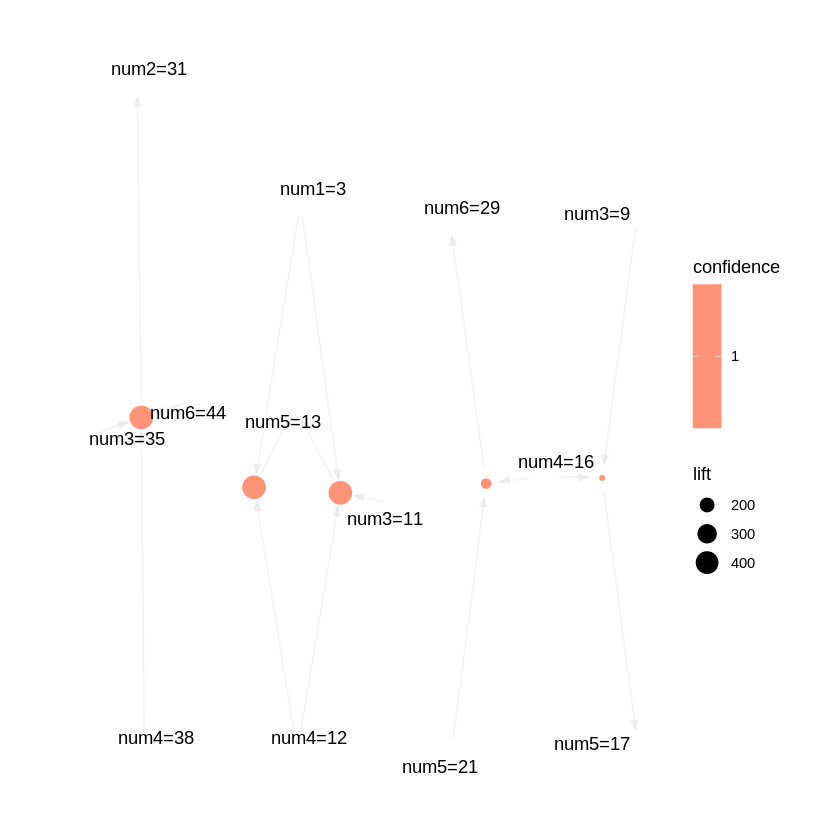

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



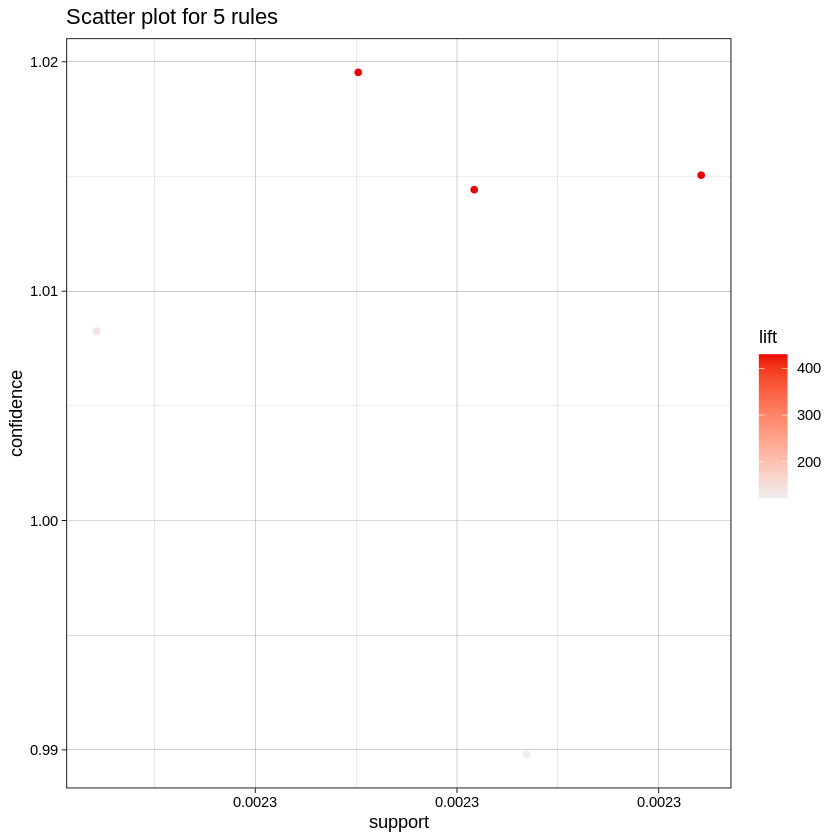

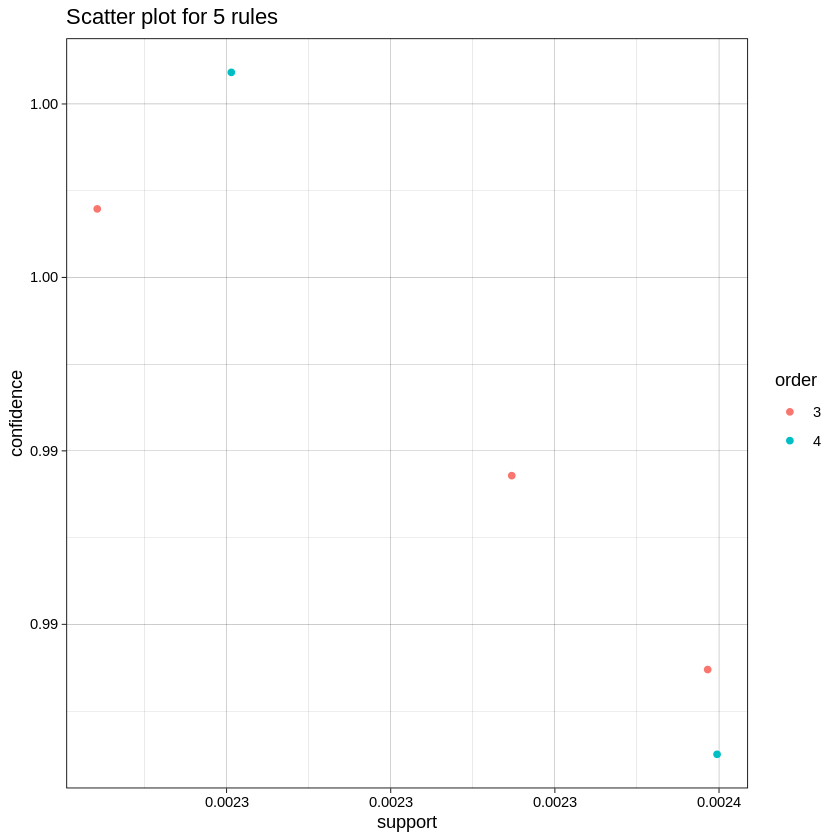

In [81]:
#아래는 신뢰도 바탕, 향상도 시각화
plot(rules[1:5],method="graph", measure="lift", shading="confidence")
plot(rules[1:5],jitter = 1)
plot(rules[1:5], shading = "order")

1. `num3`=35 -> `num6`=44, `num4`=38=>`num2`=31이 최대 신뢰도 하에서 가장 큰 리프트 값을 보이는 세트 중 하나임


# **4. 결론 (4-3)**

1. 최소 조합 항목수 파라미터를 지정하는 방법이 궁금하다.
2. 일확천금을 발원합니다.